In [1]:
import pandas as pd
df= pd.read_csv("adm_data.csv")
df.head(2)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df.shape

(400, 9)

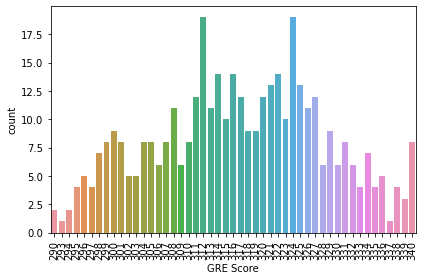

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df["GRE Score"])
plt.xticks(rotation=90) # rotate the x-axis labels by 90 degrees
plt.tight_layout()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

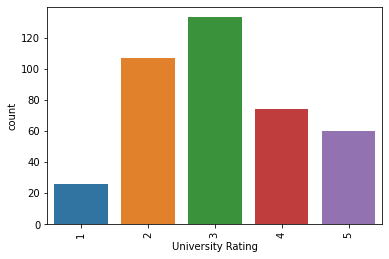

In [4]:
sns.countplot(df["University Rating"])
plt.xticks(rotation=90)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


<AxesSubplot:xlabel='Research', ylabel='count'>

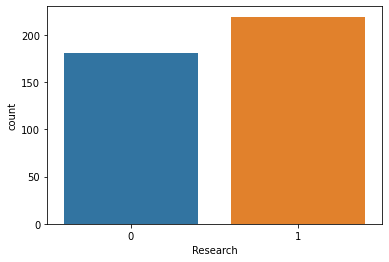

In [6]:
sns.countplot(df["Research"])


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.5'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.5'),
  Text(4, 0, '3.0'),
  Text(5, 0, '3.5'),
  Text(6, 0, '4.0'),
  Text(7, 0, '4.5'),
  Text(8, 0, '5.0')])

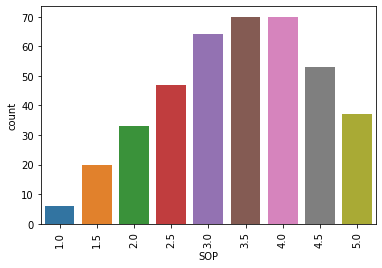

In [7]:
sns.countplot(df["SOP"])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '1.5'),
  Text(2, 0, '2.0'),
  Text(3, 0, '2.5'),
  Text(4, 0, '3.0'),
  Text(5, 0, '3.5'),
  Text(6, 0, '4.0'),
  Text(7, 0, '4.5'),
  Text(8, 0, '5.0')])

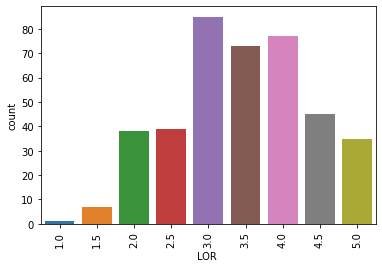

In [8]:
sns.countplot(df["LOR "])
plt.xticks(rotation=90)

In [9]:
df["LOR "]

0      4.5
1      4.5
2      3.5
3      2.5
4      3.0
      ... 
395    3.5
396    3.5
397    4.5
398    4.0
399    4.0
Name: LOR , Length: 400, dtype: float64

In [10]:
df.sample(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
223,224,308,109,2,3.0,4.0,8.45,0,0.71
186,187,317,107,3,3.5,3.0,8.68,1,0.84
20,21,312,107,3,3.0,2.0,7.90,1,0.64


In [11]:
df=df.drop(columns="Serial No.")

In [12]:
X = df.drop(columns="Chance of Admit ",axis=1)
y= df["Chance of Admit "]

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score


models = [LinearRegression(), 
          Ridge(), 
          Lasso(), 
          DecisionTreeRegressor(), 
          RandomForestRegressor()]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest']

# Evaluate each model
for model, name in zip(models, model_names):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'{name}: MSE={mse:.2f}, R2={r2:.2f}')

Linear Regression: MSE=0.00, R2=0.80
Ridge Regression: MSE=0.00, R2=0.80
Lasso Regression: MSE=0.01, R2=0.27
Decision Tree: MSE=0.00, R2=1.00
Random Forest: MSE=0.00, R2=0.96


In [14]:
from sklearn.tree import DecisionTreeRegressor
final_model = DecisionTreeRegressor()
final_model.fit(X,y)
y_preds = final_model.predict(X)

In [15]:
print(y_preds)

[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 0.8  0.78
 0.84 0.9  0.92 0.97 0.8  0.81 0.75 0.83 0.96 0.79 0.93 0.94 0.86 0.79
 0.8  0.77 0.7  0.65 0.61 0.52 0.57 0.53 0.67 0.68 0.81 0.78 0.65 0.64
 0.64 0.65 0.68 0.89 0.86 0.89 0.87 0.85 0.9  0.82 0.72 0.73 0.71 0.71
 0.68 0.75 0.72 0.89 0.84 0.93 0.93 0.88 0.9  0.87 0.86 0.94 0.77 0.78
 0.73 

In [16]:
print (y_pred)

[0.9286 0.7805 0.6955 0.7917 0.6449 0.9068 0.7394 0.6482 0.5226 0.5887
 0.6158 0.8291 0.8072 0.5916 0.6236 0.5823 0.6792 0.6548 0.6766 0.6225
 0.6336 0.6859 0.9347 0.942  0.9665 0.9412 0.7587 0.4657 0.4684 0.5245
 0.6357 0.6992 0.912  0.9121 0.9476 0.8835 0.6359 0.5573 0.5226 0.5334
 0.5334 0.5508 0.5762 0.8551 0.9065 0.8715 0.8731 0.9129 0.8024 0.7452
 0.7313 0.5611 0.7264 0.7171 0.6824 0.6354 0.5918 0.4575 0.4218 0.5245
 0.5297 0.5327 0.583  0.6091 0.6057 0.6533 0.6614 0.6457 0.7637 0.8077
 0.9407 0.9563 0.9185 0.8114 0.7508 0.7254 0.7472 0.6379 0.4421 0.4669
 0.5509 0.9534 0.9029 0.9165 0.9308 0.7474 0.7083 0.6639 0.6477 0.7517
 0.6483 0.4173 0.4506 0.4756 0.3919 0.4579 0.515  0.8328 0.9023 0.7919
 0.7149 0.6532 0.6372 0.6226 0.757  0.7277 0.8625 0.9158 0.9306 0.6955
 0.6317 0.7264 0.6284 0.7143 0.6401 0.7149 0.5994 0.465  0.5033 0.7431
 0.9398 0.9411 0.6265 0.6338 0.5957 0.6582 0.8665 0.7565 0.8214 0.9258
 0.9592 0.7369 0.7057 0.7669 0.8962 0.7874 0.7382 0.6735 0.8038 0.771
 0.8351

In [17]:
print(y)

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64


In [18]:
from sklearn import metrics
error_score = metrics.r2_score(y,y_pred)
error_score

0.963788659028365

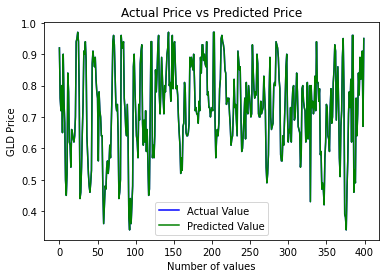

In [19]:

y_pred = list(y)
plt.plot(y, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [20]:
import pickle 

In [21]:
import numpy as np
input_data = (337,118,4,4.5,4.5,9.65,1)
input_data_as_nparray = np.asarray(input_data)
input_data_reshape =input_data_as_nparray.reshape(1,-1)
prediction = final_model.predict(input_data_reshape)
print(prediction)

[0.92]


/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [22]:
filename = 'trained_model.sav'
pickle.dump(final_model, open(filename, 'wb'))
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [27]:
input_data = (300,113,3,3,3.5,8.65,1)
input_data_as_nparray = np.asarray(input_data)
input_data_reshape =input_data_as_nparray.reshape(1,-1)
prediction = loaded_model.predict(input_data_reshape)
print(prediction)

[0.64]


/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
